# Capstone project - Battle of the nieghborhoods Week 2
### Data science course IBM - Coursera

## Table of contents

* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results](#results)
* [Discusion](#discusion)
* [Conclusion](#conclusion)

## Introduction <a name='introduction'></a>

In Mexico the census of the whole population is taken **every 10 years** (as in the US), and according to the gathered information some classifications are created based on the numbers obtained, one of those classifications is the *ambit of an area, those could be rural or urban* (depending on the population of each area).
<br>
Given that the census is taken every 10 years, the conditions of the population change and some areas classified as rural could be on the **verge of becoming an urban areas.**
<br>
*As an area transits from rural to urban the services needed differ* and knowing which areas are on this process of urbanization is helpful to service providers and government institutes in order to provide the necessary services to this areas.
<br>
For this project I will be using the information from Mexico. The country is divided into states, each states has municipalities and each municipality has neighborhoods. The information gathered is from the Toluca municipality, located inside the State of Mexico; one of the biggest states in Mexico in terms
of population and economic activity.
<br>

## Data <a name='data'></a>
In this project I will use the data available from the National Institute of Information,  Stadistics and Georaphy (*INEGI* for its initials in Spanish).
The institute provides a repository with geographic information regarding the neighborhoods of each municipality which contains the ambit (rural or urban) as well as the coordinates (latitude and londigutde) of each neighboorhood.
As requested in the project the information about venues will be consulted using Foursquare API.
Also to avoid multitude of categories used on Foursquare a process is considered to retrieve the top level category of each venue.

Data initialization for processing

In [1]:
# Libraries to be used
import pandas as pd
from pandas.io.json import json_normalize
import requests
import numpy as np 
import json
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
print('Libraries imported')

Libraries imported


In [2]:
# Procedures to find in which category level is the category ID provided
def isCatLvl1 (categoryID):
    band=-1
    ind=cats_lvl1[cats_lvl1['CategoryID']==categoryID].index.values
    try:
        band=ind.item(0)
    except:
        band=-1
    if band != -1:
        return True
    else:
        return False
    
def isCatLvl2 (categoryID):
    band=-1
    ind=cats_lvl2[cats_lvl2['CategoryID']==categoryID].index.values
    try:
        band=ind.item(0)
    except:
        band=-1
    if band != -1:
        return True
    else:
        return False
    
def isCatLvl3 (categoryID):
    band=-1
    ind=cats_lvl3[cats_lvl3['CategoryID']==categoryID].index.values
    try:
        band=ind.item(0)
    except:
        band=-1
    if band != -1:
        return True
    else:
        return False

def isCatLvl4 (categoryID):
    band=-1
    ind=cats_lvl4[cats_lvl4['CategoryID']==categoryID].index.values
    try:
        band=ind.item(0)
    except:
        band=-1
    if band != -1:
        return True
    else:
        return False

def isCatLvl5 (categoryID):
    band=-1
    ind=cats_lvl5[cats_lvl5['CategoryID']==categoryID].index.values
    try:
        band=ind.item(0)
    except:
        band=-1
    if band != -1:
        return True
    else:
        return False
    
# Procedures to return the main category ID and category name from the provided category ID
def returnFromCat5 (categoryID):
    #Lookup in category level 5
    ind5=cats_lvl5[cats_lvl5['CategoryID']==categoryID].index.values.item(0)
    cat4=cats_lvl5.iloc[ind5]['ParentCategoryID']
    #Lookup in category 4
    ind4=cats_lvl4[cats_lvl4['CategoryID']==cat4].index.values.item(0)
    cat3=cats_lvl4.iloc[ind4]['ParentCategoryID']
    #Lookup in category 3
    ind3=cats_lvl3[cats_lvl3['CategoryID']==cat3].index.values.item(0)
    cat2=cats_lvl3.iloc[ind3]['ParentCategoryID']
    #Lookup in category 2
    ind2=cats_lvl2[cats_lvl2['CategoryID']==cat2].index.values.item(0)
    cat1=cats_lvl2.iloc[ind2]['ParentCategoryID']
    #Lookup name in category 1
    ind1=cats_lvl1[cats_lvl1['CategoryID']==cat1].index.values.item(0)
    catName1=cats_lvl1.iloc[ind1]['CategoryName']
    return [cat1,catName1]

def returnFromCat4 (categoryID):
    #Lookup in category 4
    ind4=cats_lvl4[cats_lvl4['CategoryID']==categoryID].index.values.item(0)
    cat3=cats_lvl4.iloc[ind4]['ParentCategoryID']
    #Lookup in category 3
    ind3=cats_lvl3[cats_lvl3['CategoryID']==cat3].index.values.item(0)
    cat2=cats_lvl3.iloc[ind3]['ParentCategoryID']
    #Lookup in category 2
    ind2=cats_lvl2[cats_lvl2['CategoryID']==cat2].index.values.item(0)
    cat1=cats_lvl2.iloc[ind2]['ParentCategoryID']
    #Lookup name in category 1
    ind1=cats_lvl1[cats_lvl1['CategoryID']==cat1].index.values.item(0)
    catName1=cats_lvl1.iloc[ind1]['CategoryName']
    return [cat1,catName1]
    
def returnFromCat3 (categoryID):
    #Lookup in category 3
    ind3=cats_lvl3[cats_lvl3['CategoryID']==categoryID].index.values.item(0)
    cat2=cats_lvl3.iloc[ind3]['ParentCategoryID']
    #Lookup in category 2
    ind2=cats_lvl2[cats_lvl2['CategoryID']==cat2].index.values.item(0)
    cat1=cats_lvl2.iloc[ind2]['ParentCategoryID']
    #Lookup name in category 1
    ind1=cats_lvl1[cats_lvl1['CategoryID']==cat1].index.values.item(0)
    catName1=cats_lvl1.iloc[ind1]['CategoryName']
    return [cat1,catName1]

def returnFromCat2 (categoryID):
    #Lookup in category 2
    ind2=cats_lvl2[cats_lvl2['CategoryID']==categoryID].index.values.item(0)
    cat1=cats_lvl2.iloc[ind2]['ParentCategoryID']
    #Lookup name in category 1
    ind1=cats_lvl1[cats_lvl1['CategoryID']==cat1].index.values.item(0)
    catName1=cats_lvl1.iloc[ind1]['CategoryName']
    return [cat1,catName1]

print('Procedures loadad in notebook')

Procedures loadad in notebook


#### Data adquisition

In [3]:
url='https://gaia.inegi.org.mx/wscatgeo/localidades/15/106' 
results=requests.get(url).json()["datos"]

location_list=[]
for res in results:
    location_list.append([res["cve_loc"],res["nom_loc"],res["ambito"],res["latitud"],res["longitud"]])
    
locations=pd.DataFrame(location_list,columns=['code','name','ambit','latitude','longitude'])
print(locations.shape)
locations.head()

(116, 5)


,code,name,ambit,latitude,longitude
0,0001,Toluca de Lerdo,URBANO,19.2934881,-99.6573167
1,0043,Cacalomacán,URBANO,19.2533094,-99.7045881
2,0044,Calixtlahuaca,URBANO,19.3345053,-99.6854750
3,0046,Capultitlán,URBANO,19.2491839,-99.6630375
4,0049,Arroyo Vista Hermosa,RURAL,19.3375981,-99.5509325


In [4]:
# The code was removed by Watson Studio for sharing.

Data for Foursquare API call set
Categories of venues selected:
4d4b7104d754a06370d81259 > Arts and entreteinment
4d4b7105d754a06374d81259 > Food
4d4b7105d754a06376d81259 > Nocturne local
4d4b7105d754a06377d81259 > Open air and recreation
4d4b7105d754a06378d81259 > Store and services


In [5]:
# This cell is used to get all the nearby venues using Foursquare API
def getLocationVenues(codes,names,ambits,latitudes,longitudes):
    
    venues_list=[]
    cont=0
    for code,name,ambit,lat,lng in zip(codes,names,ambits,latitudes,longitudes):
        cont=cont+1
            
        url='https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            RADIUS,
            categoryIDs,
            LIMIT)
        results=requests.get(url).json()['response']['venues']
        venues_list.append([(
                    code,
                    name,
                    ambit,
                    lat,
                    lng,
                    v['name'], 
                    v['location']['lat'], 
                    v['location']['lng'],
                    v['categories'][0]['id'],
                    v['categories'][0]['name']) for v in results])

        nearby_venues=pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns=['LocationCode','LocationName','LocationAmbit','LocationLat','LocationLong',
                    'VenueName','VenueLatitude','VenueLongitude','VenueCategoryID','VenueCategory']

    return(nearby_venues)

locations_venues=getLocationVenues(codes=locations['code'],
                                   names=locations['name'],
                                   ambits=locations['ambit'],
                                   latitudes=locations['latitude'],
                                   longitudes=locations['longitude'])
print('Toluca venues adquire')
print(locations_venues.shape)
locations_venues.head()

Toluca venues adquire
(348, 10)


,LocationCode,LocationName,LocationAmbit,LocationLat,LocationLong,VenueName,VenueLatitude,VenueLongitude,VenueCategoryID,VenueCategory
0,0001,Toluca de Lerdo,URBANO,19.2934881,-99.6573167,Plaza de los Mártires,19.292603,-99.656929,4bf58dd8d48988d164941735,Plaza
1,0001,Toluca de Lerdo,URBANO,19.2934881,-99.6573167,La Tradición Café Gourmet,19.292747,-99.658783,4bf58dd8d48988d16d941735,Café
2,0001,Toluca de Lerdo,URBANO,19.2934881,-99.6573167,Museo José María Velasco,19.293213,-99.657874,4bf58dd8d48988d18f941735,Art Museum
3,0001,Toluca de Lerdo,URBANO,19.2934881,-99.6573167,Museo De Bellas Artes Toluca,19.293937,-99.655868,4bf58dd8d48988d18f941735,Art Museum
4,0001,Toluca de Lerdo,URBANO,19.2934881,-99.6573167,Catedral de San José de Toluca,19.292013,-99.657189,4bf58dd8d48988d132941735,Church


In [6]:
url='https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION)
results=requests.get(url).json()['response']
print('List of all Foursquare venue categories obtained')

List of all Foursquare venue categories obtained


In [7]:
# Iteration of the JSON categories file to obtain all the heirarchical categories to aggregate data to first level
cont1=0
cont2=0
cont3=0
cont4=0
cont5=0
cat_lvl1=[]
cat_lvl2=[]
cat_lvl3=[]
cat_lvl4=[]
cat_lvl5=[]
result_cat1 = results['categories']
for cat1 in result_cat1:
    cat_lvl1.append([cat1['id'],cat1['name']])
    if 'categories' in (cat1.keys()):
        result_cat2=result_cat1[cont1]['categories']
        for cat2 in result_cat2:
            cat_lvl2.append([cat1['id'],cat2['id'],cat2['name']])
            if 'categories' in (cat2.keys()):
                result_cat3=result_cat2[cont2]['categories']
                for cat3 in result_cat3:
                    cat_lvl3.append([cat2['id'],cat3['id'],cat3['name']])
                    if 'categories' in (cat3.keys()):
                        result_cat4=result_cat3[cont3]['categories']
                        for cat4 in result_cat4:
                            cat_lvl4.append([cat3['id'],cat4['id'],cat4['name']])
                            if 'categories' in (cat4.keys()):
                                result_cat5=result_cat4[cont4]['categories']
                                for cat5 in result_cat5:
                                    cat_lvl5.append([cat4['id'],cat5['id'],cat5['name']])
                                    cont5=cont5+1
                            cont4=cont4+1
                            cont5=0
                    cont3=cont3+1
                    cont4=0
            cont2=cont2+1
            cont3=0
    cont1=cont1+1
    cont2=0

cats_lvl1=pd.DataFrame(cat_lvl1,columns=['CategoryID','CategoryName'])
cats_lvl2=pd.DataFrame(cat_lvl2,columns=['ParentCategoryID','CategoryID','CategoryName'])
cats_lvl3=pd.DataFrame(cat_lvl3,columns=['ParentCategoryID','CategoryID','CategoryName'])
cats_lvl4=pd.DataFrame(cat_lvl4,columns=['ParentCategoryID','CategoryID','CategoryName'])
cats_lvl5=pd.DataFrame(cat_lvl5,columns=['ParentCategoryID','CategoryID','CategoryName'])

print('Foursquare categories rank in hierarchical order')

Foursquare categories rank in hierarchical order


In [8]:
# Reclassification on venue category to be the first hierarchy level
for item in locations_venues.index:
    if isCatLvl5(locations_venues['VenueCategoryID'][item]):
        aux=returnFromCat5(locations_venues['VenueCategoryID'][item])
        locations_venues.replace(to_replace=locations_venues['VenueCategoryID'][item],value=aux[0],inplace=True)
        locations_venues.replace(to_replace=locations_venues['VenueCategory'][item],value=aux[1],inplace=True)
    if isCatLvl4(locations_venues['VenueCategoryID'][item]):
        aux=returnFromCat4(locations_venues['VenueCategoryID'][item])
        locations_venues.replace(to_replace=locations_venues['VenueCategoryID'][item],value=aux[0],inplace=True)
        locations_venues.replace(to_replace=locations_venues['VenueCategory'][item],value=aux[1],inplace=True)
    if isCatLvl3(locations_venues['VenueCategoryID'][item]):
        aux=returnFromCat3(locations_venues['VenueCategoryID'][item])
        locations_venues.replace(to_replace=locations_venues['VenueCategoryID'][item],value=aux[0],inplace=True)
        locations_venues.replace(to_replace=locations_venues['VenueCategory'][item],value=aux[1],inplace=True)
    if isCatLvl2(locations_venues['VenueCategoryID'][item]):
        aux=returnFromCat2(locations_venues['VenueCategoryID'][item])
        locations_venues.replace(to_replace=locations_venues['VenueCategoryID'][item],value=aux[0],inplace=True)
        locations_venues.replace(to_replace=locations_venues['VenueCategory'][item],value=aux[1],inplace=True)

print(len(locations_venues['VenueCategoryID'].unique()))
locations_venues.head()

6


,LocationCode,LocationName,LocationAmbit,LocationLat,LocationLong,VenueName,VenueLatitude,VenueLongitude,VenueCategoryID,VenueCategory
0,0001,Toluca de Lerdo,URBANO,19.2934881,-99.6573167,Plaza de los Mártires,19.292603,-99.656929,4d4b7105d754a06377d81259,Outdoors & Recreation
1,0001,Toluca de Lerdo,URBANO,19.2934881,-99.6573167,La Tradición Café Gourmet,19.292747,-99.658783,4d4b7105d754a06374d81259,Food
2,0001,Toluca de Lerdo,URBANO,19.2934881,-99.6573167,Museo José María Velasco,19.293213,-99.657874,4d4b7104d754a06370d81259,Arts & Entertainment
3,0001,Toluca de Lerdo,URBANO,19.2934881,-99.6573167,Museo De Bellas Artes Toluca,19.293937,-99.655868,4d4b7104d754a06370d81259,Arts & Entertainment
4,0001,Toluca de Lerdo,URBANO,19.2934881,-99.6573167,Catedral de San José de Toluca,19.292013,-99.657189,4d4b7105d754a06375d81259,Professional & Other Places


## Methodology <a name='methodology'></a>
In the project we will review two methods to predict which neighborhoods are in the process of urbanization:
1. Logistic regresion (supervised method)
2. Clustering (unsupervised method

#### Logistic regresion
    This method is used to predict a categorical value (rural or urban) with a diven set of independent data

#### K-Means
    For this we will use K-Means for clustering rural neighborhoods given the quantity of venues around them

## Analysis <a name='analysis'></a>
As initial exploration of the data adquired, let's see a bar chart of the percentage of venues per category from both ambits

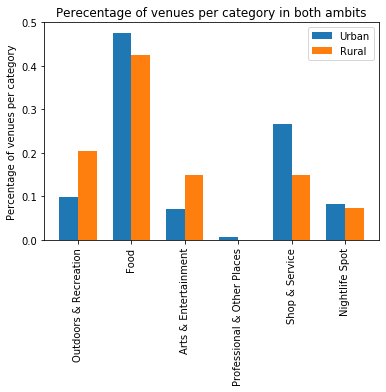

In [11]:
# Graphic with the difference in quantity of each category per ambit

location_urban=locations_venues[locations_venues.LocationAmbit=='URBANO']
location_rural=locations_venues[locations_venues.LocationAmbit=='RURAL']
labels=locations_venues['VenueCategory'].unique()

urban_grpd=location_urban.groupby('VenueCategory').count()
urban_qty=urban_grpd['VenueCategoryID']/urban_grpd['VenueCategoryID'].sum()

rural_grpd=location_rural.groupby('VenueCategory').count()
rural_qty=rural_grpd['VenueCategoryID']/rural_grpd['VenueCategoryID'].sum()

urban_qty_list=[]
rural_qty_list=[]
for label in labels:
    try:
        urban_qty_list.append(urban_qty[label])
    except:
        urban_qty_list.append(0)
    try:
        rural_qty_list.append(rural_qty[label])
    except:
        rural_qty_list.append(0)

x = np.arange(len(labels))
widht=0.35
fig,ax=plt.subplots()
rect_urb=ax.bar(x-widht/2,urban_qty_list,widht,label='Urban')
rect_rur=ax.bar(x+widht/2,rural_qty_list,widht,label='Rural')
ax.set_ylabel('Percentage of venues per category')
ax.set_title('Perecentage of venues per category in both ambits')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)
ax.legend()
plt.show()

As we can appreciate on the bar chart there is not big difference on the percentages of venues per category among both ambits.
This could lead to a low accuracy on the prediction model.

In [14]:
# One hot encoding of venues categories for training model
location_venues_onehot=pd.get_dummies(locations_venues[['VenueCategory']],prefix="",prefix_sep="")
location_venues_onehot['LocationName']=locations_venues['LocationName']

# move LocationName column to the first column
fixed_columns=[location_venues_onehot.columns[-1]] + list(location_venues_onehot.columns[:-1])
location_venues_onehot=location_venues_onehot[fixed_columns]

# Pandas dataframe to add geographic data to training model (ambit)
location_merged=locations[['name','ambit','latitude','longitude']]
location_merged.columns=['LocationName','LocationAmbit','LocationLat','LocationLong']

location_venues_grouped=location_venues_onehot.groupby('LocationName').sum().reset_index()
location_venues_grouped.head()
location_venues_grouped.columns=['LocationName','Arts','Food','Nightlife','Recreation','Professional','Shop']
location_venues_grouped=pd.merge(location_venues_grouped,location_merged,on='LocationName')
location_venues_grouped.replace(to_replace='URBANO',value=1,inplace=True)
location_venues_grouped.replace(to_replace='RURAL',value=0,inplace=True)

print(location_venues_grouped.shape)
location_venues_grouped.tail()

(49, 10)


,LocationName,Arts,Food,Nightlife,Recreation,Professional,Shop,LocationAmbit,LocationLat,LocationLong
44,Santiago Tlaxomulco,0,3,0,0,0,1,1,19.3141106,-99.6703556
45,Sauces,1,7,1,0,0,3,1,19.3588017,-99.5922608
46,Toluca 2000 [Parque Industrial],0,4,0,0,0,0,0,19.3812744,-99.5792397
47,Toluca de Lerdo,10,19,1,10,1,7,1,19.2934881,-99.6573167
48,Villa Toscana [Conjunto Urbano],1,1,0,0,0,1,0,19.3670489,-99.5664267


In [15]:
# Define data set for training model
X=np.asarray(location_venues_grouped[['Arts','Food','Nightlife','Recreation','Professional','Shop']])
y=np.asarray(location_venues_grouped['LocationAmbit'])
X=preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat1 = LR.predict(X_test)
print("Results liblinear solver")
print("Jaccard score ",jaccard_score(y_test, yhat1))
print (classification_report(y_test, yhat1))

Results liblinear solver
Jaccard score  0.5
              precision    recall  f1-score   support

           0       0.38      0.75      0.50         4
           1       0.86      0.55      0.67        11

    accuracy                           0.60        15
   macro avg       0.62      0.65      0.58        15
weighted avg       0.73      0.60      0.62        15



As we can see on the classification report the accuracy of the logistic regresion is low, <70%
Therefore this method is not the best given the information of the Tolca municipaly; maybe with other municipality this method could provide a more accurate prediction

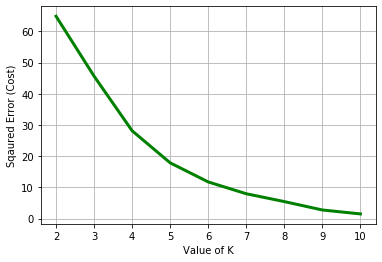

In [16]:
# Cell to execute clustering with K-means and plot results to find best K
location_rural_grp=location_venues_grouped[location_venues_grouped.LocationAmbit==0]
X_rural=np.asarray(location_rural_grp[['Arts','Food','Nightlife','Recreation','Professional','Shop']])
X_rural = preprocessing.StandardScaler().fit(X_rural).transform(X_rural)

cost=[]
for Ks in range(2,11):
    k_means = KMeans(init = "k-means++", n_clusters = Ks, n_init = 50)
    k_means.fit(X_rural)
    cost.append(k_means.inertia_)
    
plt.plot(range(2,11), cost, color ='green', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)")
plt.grid(True)
plt.show()

Using the elbow method we can see that the best K for the algorith is 6

In [17]:
k_means = KMeans(init="k-means++",n_clusters=6,n_init=50)
k_means.fit(X_rural)
k_labels=[]
k_labels=k_means.predict(X_rural)
location_rural_grp['Cluster']=k_labels
location_rural_grp.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,LocationName,Arts,Food,Nightlife,Recreation,Professional,Shop,LocationAmbit,LocationLat,LocationLong,Cluster
0,Aviación Autopan,0,0,0,2,0,0,0,19.3792578,-99.6934672,2
1,Barrio el Mirador,0,1,0,0,0,0,0,19.2330694,-99.6391131,4
2,Barrio la Cruz,0,2,0,0,0,1,0,19.2503267,-99.6564486,0
3,Barrio la Venta,0,0,1,0,0,0,0,19.2411956,-99.6353064,1
7,Colonia Dos Ríos,0,1,1,1,0,1,0,19.2496578,-99.6427258,1


In [18]:
# Creation of new dataframes (urban and per cluster) to be set on map
urban_locations=locations[locations.ambit=='URBANO']
location_rural_grp0=location_rural_grp[location_rural_grp.Cluster==0]
location_rural_grp1=location_rural_grp[location_rural_grp.Cluster==1]
location_rural_grp2=location_rural_grp[location_rural_grp.Cluster==2]
location_rural_grp3=location_rural_grp[location_rural_grp.Cluster==3]
location_rural_grp4=location_rural_grp[location_rural_grp.Cluster==4]
location_rural_grp5=location_rural_grp[location_rural_grp.Cluster==5]

In the following cell we see a summary per cluster in order to interpret the results of k-Means

In [19]:
location_rural_clus=location_rural_grp.groupby('Cluster').sum().reset_index()
location_rural_clus=location_rural_clus.sort_values(by=['Food','Shop','Recreation'],ascending=False)
location_rural_clus.head(7)

,Cluster,Arts,Food,Nightlife,Recreation,Professional,Shop,LocationAmbit
5,5,0,9,0,1,0,0,0
0,0,1,8,0,0,0,6,0
3,3,7,3,0,0,0,0,0
4,4,0,2,0,2,0,0,0
1,1,0,1,4,1,0,1,0
2,2,0,0,0,7,0,1,0


|Cluster|Color in map|Interpretation|
|-|-|-|
|4|red|Neighborhood mostly urbanized|
|1|orangered|Neighborhood almost urbanized|
|3|orange|Neighborhood almost being urbanized|
|5|olive|Neighborhood less urbanized|
|0|green|Neighborhood to be urbanized|
|2|lime|Neighborhood poorly urbanized|

In [20]:
toluca_map = folium.Map(location=[19.2934881,-99.6573167], zoom_start=11,tiles='Stamen Toner')

# Marking urban areas with color blue (#0000FF)
for lat,long,name in zip (urban_locations['latitude'],urban_locations['longitude'],urban_locations['name']):
    folium.CircleMarker([lat,long],radius=5,color='#0000FF',popup=name,fill=True,fill_opacity=0.7).add_to(toluca_map)

# Marking rural area from cluster 0 color green #008000
for lat,long,name in zip (location_rural_grp0['LocationLat'],location_rural_grp0['LocationLong'],location_rural_grp0['LocationName']):
    folium.CircleMarker([lat,long],radius=4,color='#008000',popup=name,fill=True,fill_opacity=0.7).add_to(toluca_map)

# Marking rural area from cluster 1 color orangered #FF4500
for lat,long,name in zip (location_rural_grp1['LocationLat'],location_rural_grp1['LocationLong'],location_rural_grp1['LocationName']):
    folium.CircleMarker([lat,long],radius=4,color='#FF4500',popup=name,fill=True,fill_opacity=0.7).add_to(toluca_map)

# Marking rural area from cluster 2 color lawn green #7CFC00
for lat,long,name in zip (location_rural_grp2['LocationLat'],location_rural_grp2['LocationLong'],location_rural_grp2['LocationName']):
    folium.CircleMarker([lat,long],radius=4,color='#7CFC00',popup=name,fill=True,fill_opacity=0.7).add_to(toluca_map)

# Marking rural area from cluster 3 color orange #FFA500
for lat,long,name in zip (location_rural_grp3['LocationLat'],location_rural_grp3['LocationLong'],location_rural_grp3['LocationName']):
    folium.CircleMarker([lat,long],radius=4,color='#FFA500',popup=name,fill=True,fill_opacity=0.7).add_to(toluca_map)

# Marking rural area from cluster 4 color red #FF0000
for lat,long,name in zip (location_rural_grp4['LocationLat'],location_rural_grp4['LocationLong'],location_rural_grp4['LocationName']):
    folium.CircleMarker([lat,long],radius=4,color='#FF0000',popup=name,fill=True,fill_opacity=0.7).add_to(toluca_map)

# Marking rural area from cluster 5 color olive #808000
for lat,long,name in zip (location_rural_grp5['LocationLat'],location_rural_grp5['LocationLong'],location_rural_grp5['LocationName']):
    folium.CircleMarker([lat,long],radius=4,color='#808000',popup=name,fill=True,fill_opacity=0.7).add_to(toluca_map)

toluca_map

## Results <a name='results'></a>
#### Logistic regresion model
As seen by the Jaccard score and accuracy in classification report the data set is not the most appropriate to predict if a given neighboorhood is rural or urban according to the summary of venues, this could be originated in the fact that Toluca municipality is almost urban and the difference between these two ambits is no longer that evident.

#### K-Means
Using the clustering of K-Means we can see that despite the fact that almost all the municipality is becoming urbanized, there are neighboorhoods which are ahead of this process.
As we can see the first three clusters (from red to orange) are located near the airport and also have been an increase of industrial parks created in that zone.
In the other hand we can see in clusters 3-6 (from olive to lime) the venues are more related to recreation and shops and this concurs the real state developments around that zone of the municipality of Metepec.

## Discusion <a name='discusion'></a>
Finding which neighborhoods are going trough a process of urbanization is an important task due to the different services a community needs.
Unfortunately the first approach was not highly accurate given the situation of the municipality studied; however I believe this could be achieved with a different set of data in which the difference of these two ambits is more broad.
This step back on a prediction algorithm allow me to explore other methods; and using an automatic clustering I was able to find some insights of this neighborhoods and how are they changing.
Luckily this work is being done in year 2020 and the census result can be expected soon in order to validate the methods and findings of this work.

## Conclusion <a name='conclusion'></a>
The results of this excercise could be useful to service providers such as mobile conections, broadband and electricity just to name a few particular providers. 
These results could be useful to government agencies on the three levels (municipality, state and federal) as the changes in the population lead to the need of new roads, increase of police force and water supply as some examples.